In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 

data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Removing Car Name

In [26]:
unique_names = data['car name'].nunique()
print(f'There are {unique_names} car names. Very unique data and therefore will be dropped')
data = data.drop(['car name'], axis = 1)

There are 305 car names. Very unique data and therefore will be dropped


Horsepower column

In [27]:
hp_is_digit = pd.DataFrame(data.horsepower.str.isdigit())
missing_hp_value = len(data[hp_is_digit['horsepower'] == False])
print(f'There are {missing_hp_value} values that are missing hoursepower')

data = data.replace('?', np.nan)
data['horsepower'] = data['horsepower'].astype('float64')
data['horsepower'] = data['horsepower'].fillna(data.horsepower.median())

There are 6 values that are missing hoursepower


Summary

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observation:**

- The average mileage is approx 23 miles per gallon.
- The average number of cylinders is approx 5.
- The average displacement is approx 193 cubic inches with a standard deviation of approx 104 cubic inches.
- The average horsepower is 104.
- The average weight is approx 2970 lbs.
- The average acceleration is approx 15 sec for reaching 0 to 60 mph speed.
- The model year ranges from 1970 to 1982.

mpg
Skew : 0.46


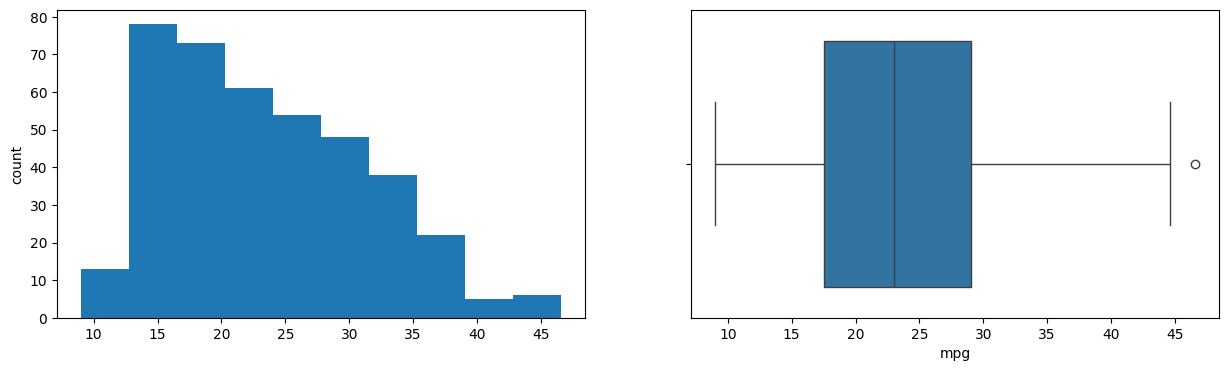

cylinders
Skew : 0.53


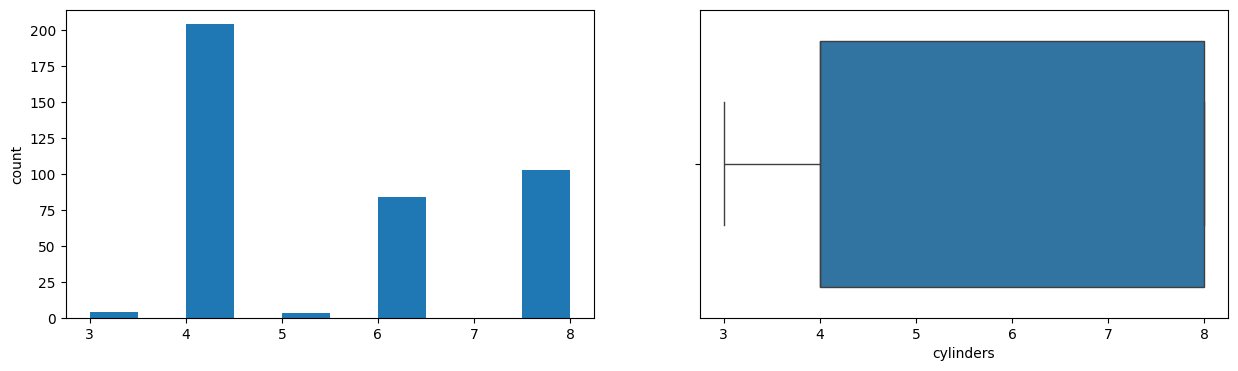

displacement
Skew : 0.72


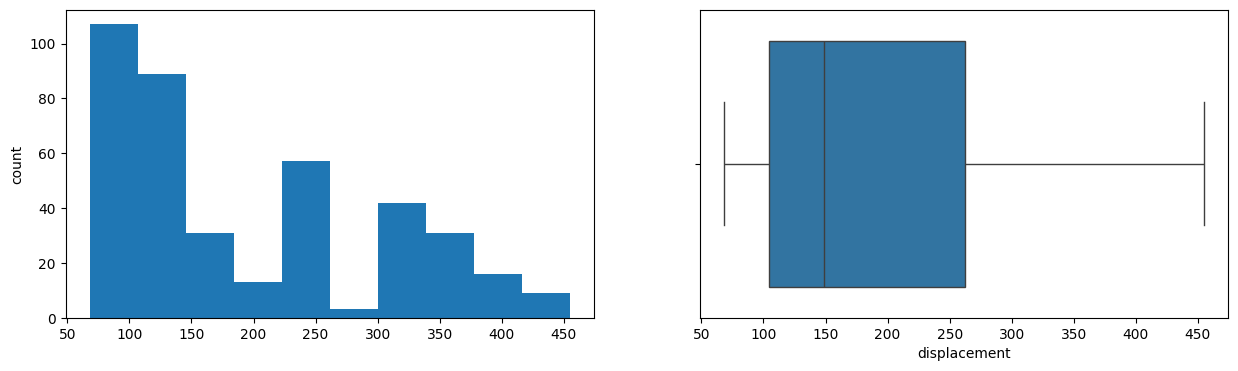

horsepower
Skew : 1.11


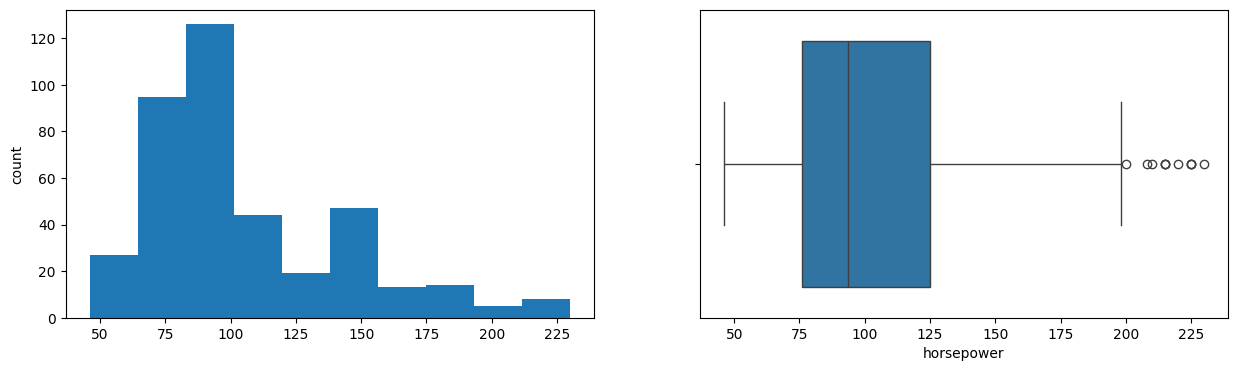

weight
Skew : 0.53


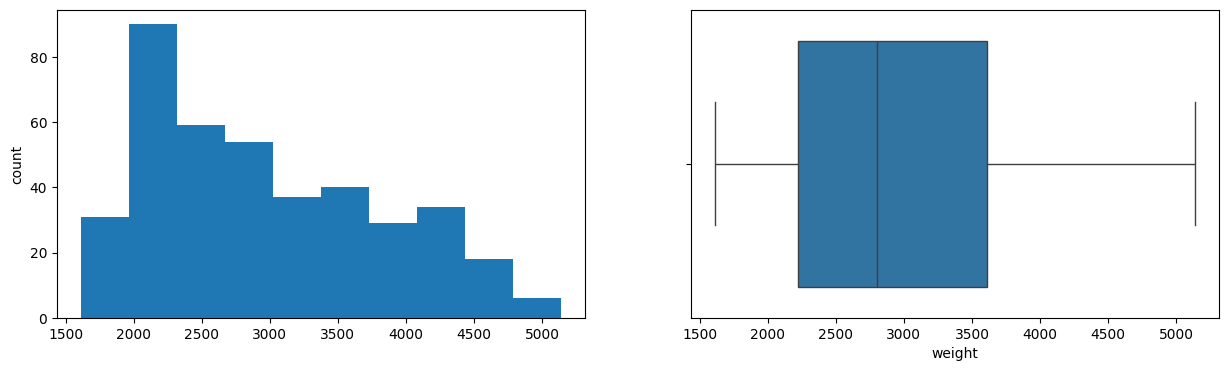

acceleration
Skew : 0.28


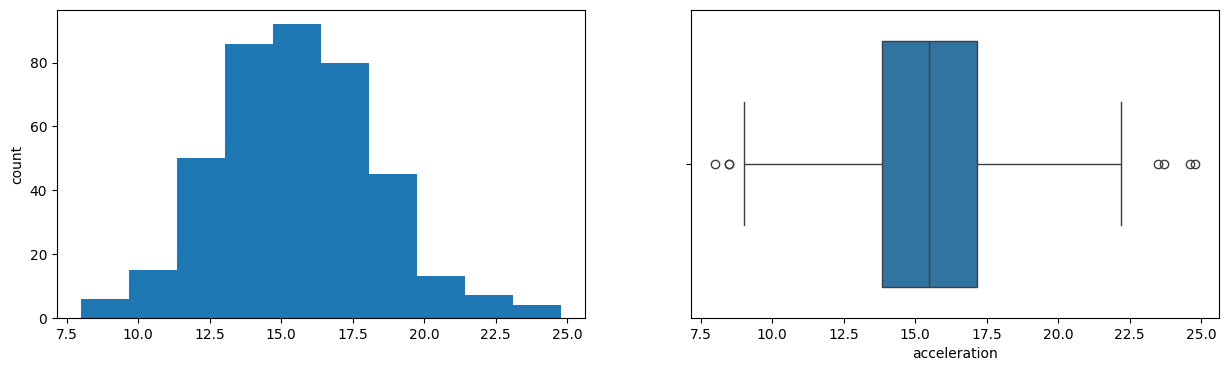

model year
Skew : 0.01


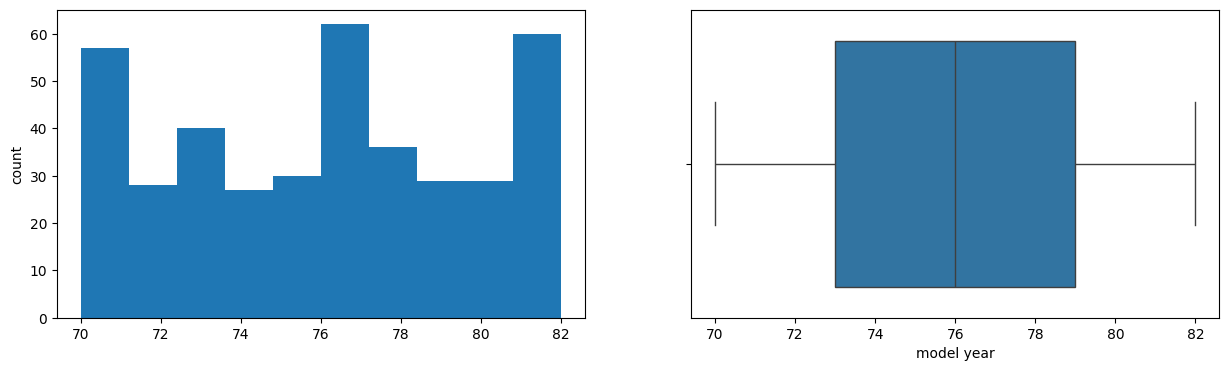

In [30]:
for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**
- The mpg, displacement, weight columns are right skewed.
- The most common number of cylinders is 4.
- The acceleration is normally distributed. 
- Most number of cars are 76 or 77 year model.
- No variable has very extreme values in the data.

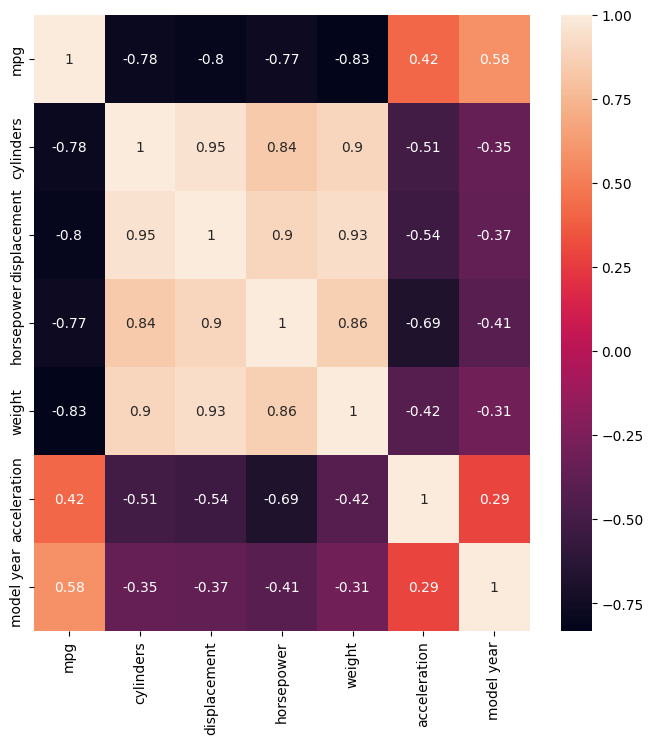

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

Scaling the Data

In [32]:
scaler = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [33]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,7.141133e-17,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335
cylinders,398.0,-3.570567e-17,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
displacement,398.0,-1.785283e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
horsepower,398.0,-7.141133e-17,1.001259,-1.527300,-0.741436,-0.283016,0.542140,3.292662
weight,398.0,-1.606755e-16,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acceleration,398.0,-2.677925e-16,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
model year,398.0,-1.642461e-15,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983


## Principal Component Analysis

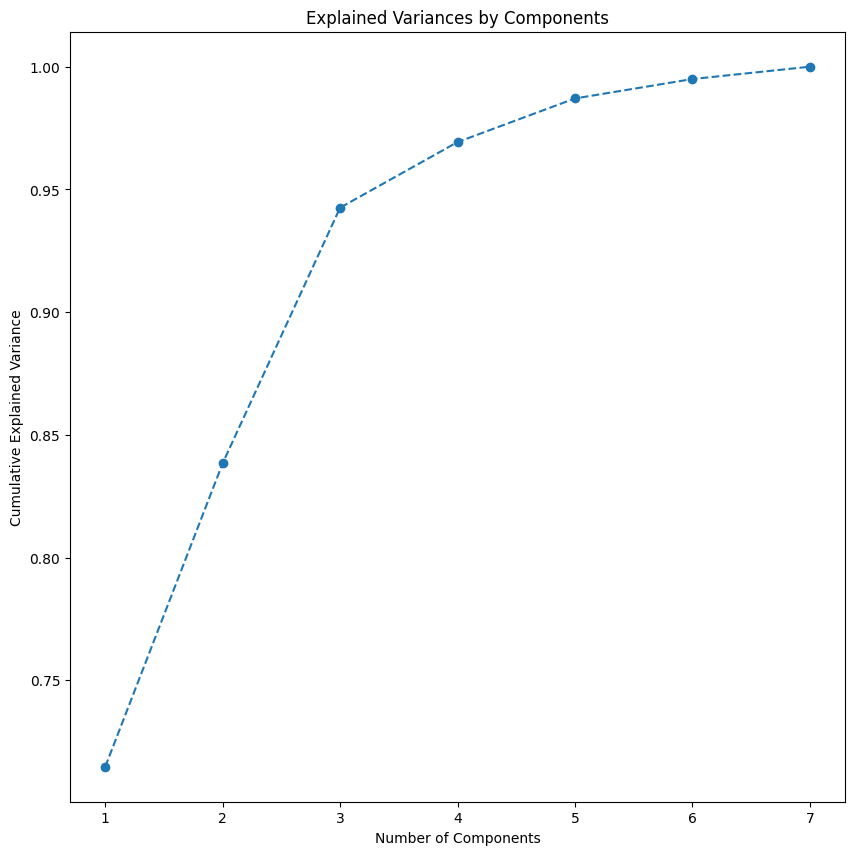

In [38]:
n = data_scaled.shape[1]
pca = PCA(n_components=n)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))
exp_var = pca.explained_variance_ratio_

plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [39]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations**:
-  We can see that out of the 7 original features, we reduced the number of features through principal components to 3, these components explain more than 90% of the original variance.
- So that is about 57% reduction in the dimensionality with a loss of 10% in variance.
- Let us now look at these principal components as a linear combination of original features.

In [42]:
pca.components_

array([[-0.39773741,  0.41648508,  0.42971252,  0.42231052,  0.41422422,
        -0.28482815, -0.22942827],
       [ 0.21142965,  0.19161162,  0.17742755,  0.09032688,  0.22195569,
        -0.0241102 ,  0.91054785],
       [-0.25657907,  0.14078607,  0.10364893, -0.16806374,  0.2796679 ,
         0.89264543, -0.01810927],
       [ 0.74906011,  0.48310136,  0.29347376, -0.03444054, -0.11312666,
         0.12794202, -0.29839943],
       [ 0.33155628, -0.48484764, -0.06193851,  0.7262367 ,  0.24412426,
         0.23742238, -0.08815347],
       [ 0.22861063, -0.34221444,  0.14610286, -0.50262055,  0.70147832,
        -0.2144526 , -0.13634971],
       [-0.08936552, -0.42945264,  0.81351966, -0.06337309, -0.36942347,
         0.0524147 ,  0.05032739]])

In [40]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,0.21,-0.26
cylinders,0.42,0.19,0.14
displacement,0.43,0.18,0.10
horsepower,0.42,0.09,-0.17
weight,0.41,0.22,0.28
acceleration,-0.28,-0.02,0.89
model year,-0.23,0.91,-0.02


In [44]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.map(color_high)

,PC1,PC2,PC3
mpg,-0.400000,0.210000,-0.260000
cylinders,0.420000,0.190000,0.140000
displacement,0.430000,0.180000,0.100000
horsepower,0.420000,0.090000,-0.170000
weight,0.410000,0.220000,0.280000
acceleration,-0.280000,-0.020000,0.890000
model year,-0.230000,0.910000,-0.020000


Text(0, 0.5, 'PC2')

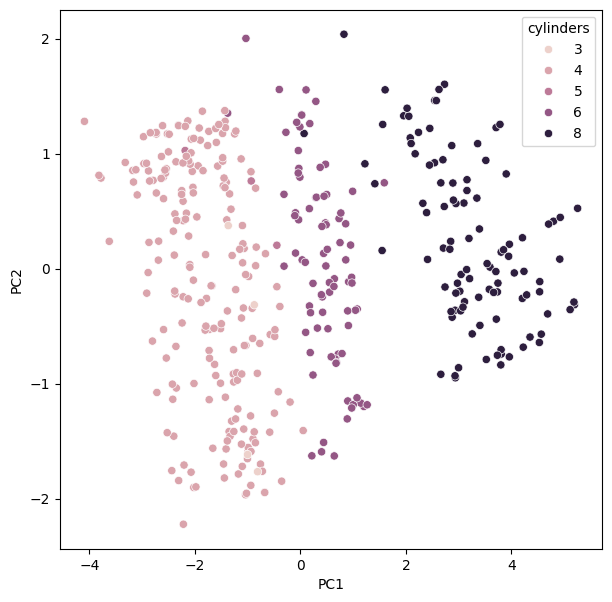

In [46]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='cylinders')
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**

- We can see there are 3 groups:
    - One with 3, 4, or 5 number of cylinders
    - One with 6 numbers of cylinders
    - One with 8 number of cylinders
- However, the distinction between the groups is not strong and there are some overlaps.